Grupo conformado por:
Edgar Andrés García Hernández - 200512532
John Pablo Calvo López - 201726690

## Exercise 05

# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.

In [25]:
import numpy as np

X=np.array([[1,1,0,0],[0,1,1,0],[0,0,0,1]])
Y=np.array([[1,0,0,0],[0,0,1,1],[0,1,1,0]])

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

modelo=Sequential()
modelo.add(Dense(units=8,input_dim=4))
modelo.add(Activation("relu"))
modelo.add(Dense(units=4))
modelo.add(Activation("sigmoid"))
modelo.compile(optimizer = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False),loss='binary_crossentropy',metrics=['accuracy'])
# Leer más sobre esta línea compile...
modelo.fit(X, Y, epochs=150)

Using TensorFlow backend.


Epoch 1/150
3/3 [==============================] - 0s 110ms/step - loss: 0.7043 - acc: 0.5000
Epoch 2/150
3/3 [==============================] - 0s 333us/step - loss: 0.7006 - acc: 0.5000
Epoch 3/150
3/3 [==============================] - 0s 334us/step - loss: 0.6937 - acc: 0.5000
Epoch 4/150
3/3 [==============================] - 0s 333us/step - loss: 0.6840 - acc: 0.5000
Epoch 5/150
3/3 [==============================] - 0s 1ms/step - loss: 0.6721 - acc: 0.5000
Epoch 6/150
3/3 [==============================] - 0s 666us/step - loss: 0.6588 - acc: 0.5833
Epoch 7/150
3/3 [==============================] - 0s 666us/step - loss: 0.6444 - acc: 0.5833
Epoch 8/150
3/3 [==============================] - 0s 999us/step - loss: 0.6293 - acc: 0.6667
Epoch 9/150
3/3 [==============================] - 0s 666us/step - loss: 0.6135 - acc: 0.6667
Epoch 10/150
3/3 [==============================] - 0s 333us/step - loss: 0.5974 - acc: 0.6667
Epoch 11/150
3/3 [==============================] - 0s 333us/

Epoch 88/150
3/3 [==============================] - 0s 1ms/step - loss: 0.0086 - acc: 1.0000
Epoch 89/150
3/3 [==============================] - 0s 999us/step - loss: 0.0084 - acc: 1.0000
Epoch 90/150
3/3 [==============================] - 0s 666us/step - loss: 0.0082 - acc: 1.0000
Epoch 91/150
3/3 [==============================] - 0s 1000us/step - loss: 0.0080 - acc: 1.0000
Epoch 92/150
3/3 [==============================] - 0s 999us/step - loss: 0.0078 - acc: 1.0000
Epoch 93/150
3/3 [==============================] - 0s 666us/step - loss: 0.0076 - acc: 1.0000
Epoch 94/150
3/3 [==============================] - 0s 666us/step - loss: 0.0075 - acc: 1.0000
Epoch 95/150
3/3 [==============================] - 0s 666us/step - loss: 0.0073 - acc: 1.0000
Epoch 96/150
3/3 [==============================] - 0s 333us/step - loss: 0.0072 - acc: 1.0000
Epoch 97/150
3/3 [==============================] - 0s 667us/step - loss: 0.0070 - acc: 1.0000
Epoch 98/150
3/3 [==============================] -

In [7]:
Y_pred=modelo.predict(X)

from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(Y, Y_pred))

print(str(Y_pred))

[[9.9697888e-01 5.4163538e-04 3.7822544e-03 2.7039922e-03]
 [2.0328532e-03 3.4170030e-03 9.9610645e-01 9.9566722e-01]
 [5.5802879e-03 9.9553853e-01 9.9650913e-01 5.2216090e-03]]


Entre más valores de entrada en la capa inicial, aumentaba la precisión del modelo. Igualmente, agregar más de una capa intermedia no aumentaba la precisión del modelo. Por alguna razón, aumentar el número de capas no mejoraba la precisión del modelo.

Igualmente, se observó que aumentar el número de corridas mejoraba bastante la precisión, permitiendo una mayor precisión para un modelo con pocas entradas. Un modelo con cuatro entradas puede obtener predicciones perfectas con aproximadamente 400 corridas, mientras uno con 8 entradas necesita aproximadamente 250.

Otro factor que también afecta es el parámetro LR (tasa de aprendizaje) en el optimizador SGD (gradiente descendente estocástico). Según Wikipedia, es un parámetro de la tasa de aprendizaje para el modelo. Aparentemente, entre más alto sea el LR el modelo obtiene una solución satisfactoria con menos iteraciones. Debo leer cuáles son las desventajas y ventajas para cada bando al seleccionar un valor para este parámetro.

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.

In [1]:
from sklearn.datasets import load_boston
boston=load_boston()
import pandas as pd
boston2=pd.DataFrame(data=boston.data)
#boston2.rename(columns=boston.feature_names)
boston2.columns=boston.feature_names
boston2["MEDV"]=boston.target
boston2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.
* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?
* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

In [20]:
z= boston2[['INDUS','LSTAT','NOX','RM','AGE','MEDV']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C46144A588>,
      dtype=object)

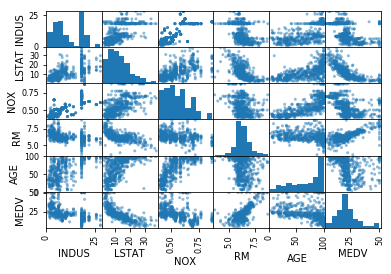

In [21]:
pd.plotting.scatter_matrix(z)

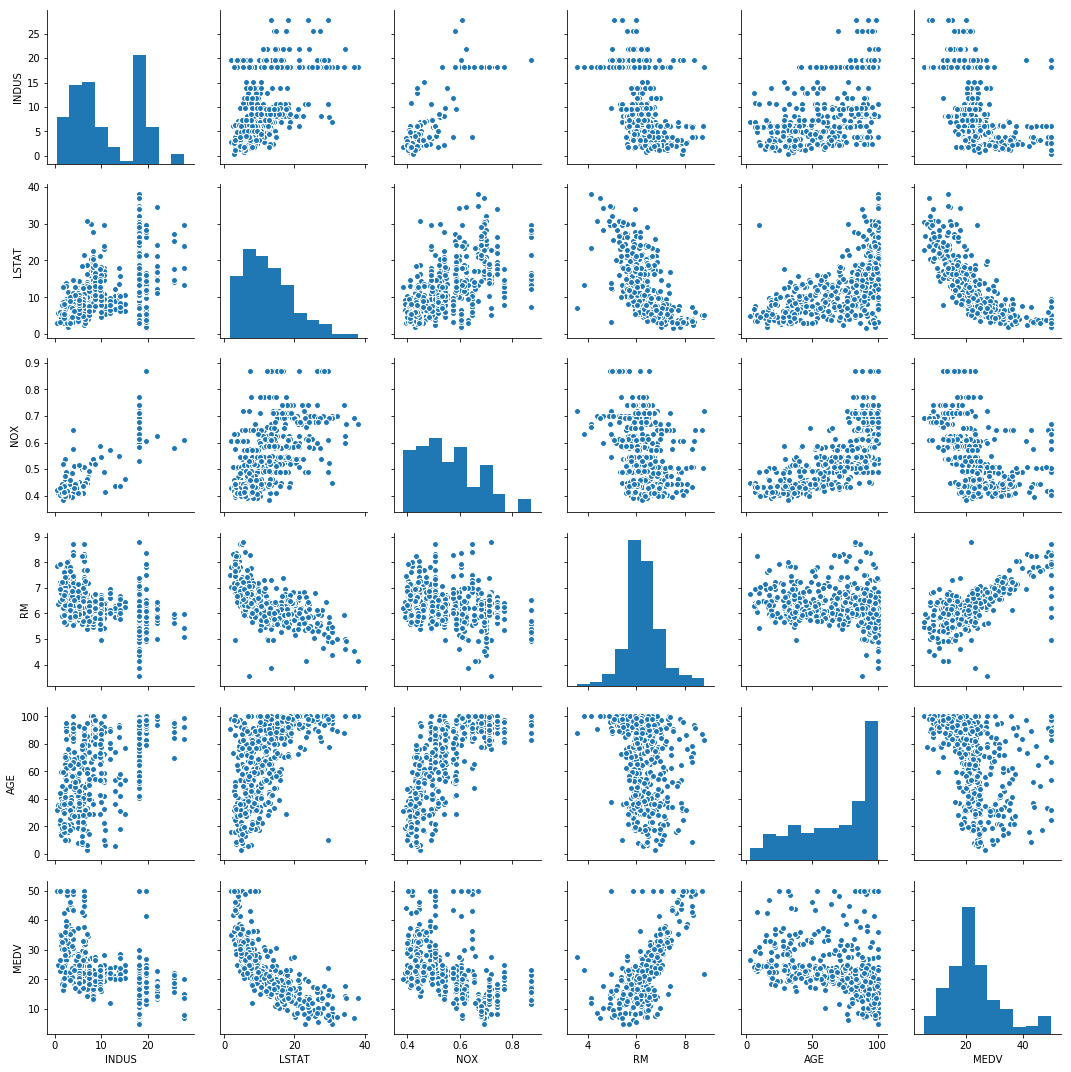

In [22]:
import seaborn as sns
iris = sns.pairplot(z)

In [26]:
np.corrcoef(z)

array([[1.        , 0.99075004, 0.97819441, ..., 0.98581972, 0.98307924,
        0.95808787],
       [0.99075004, 1.        , 0.94982287, ..., 0.99668853, 0.99682335,
        0.98682013],
       [0.97819441, 0.94982287, 1.        , ..., 0.94907484, 0.942261  ,
        0.89591008],
       ...,
       [0.98581972, 0.99668853, 0.94907484, ..., 1.        , 0.99973225,
        0.98987793],
       [0.98307924, 0.99682335, 0.942261  , ..., 0.99973225, 1.        ,
        0.99280619],
       [0.95808787, 0.98682013, 0.89591008, ..., 0.98987793, 0.99280619,
        1.        ]])

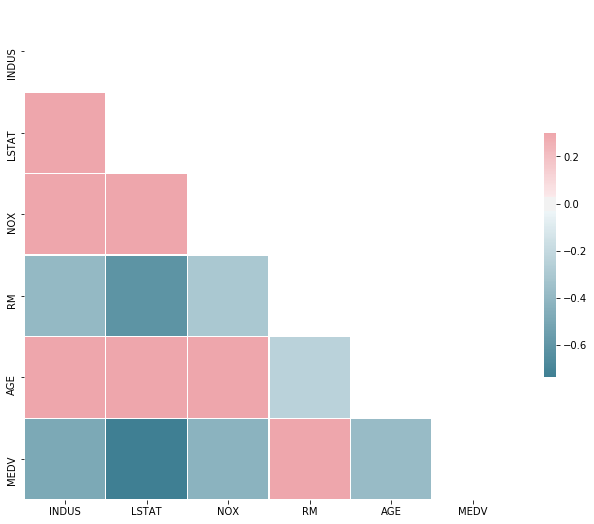

In [34]:
import matplotlib.pyplot as plt
corr = z.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
corr

,INDUS,LSTAT,NOX,RM,AGE,MEDV
INDUS,1.000000,0.603800,0.763651,-0.391676,0.644779,-0.483725
LSTAT,0.603800,1.000000,0.590879,-0.613808,0.602339,-0.737663
NOX,0.763651,0.590879,1.000000,-0.302188,0.731470,-0.427321
RM,-0.391676,-0.613808,-0.302188,1.000000,-0.240265,0.695360
AGE,0.644779,0.602339,0.731470,-0.240265,1.000000,-0.376955
MEDV,-0.483725,-0.737663,-0.427321,0.695360,-0.376955,1.000000


## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
* How does the model perform on $ D_1 $ and $ D_2 $? Why?

In [35]:
x1 = boston2['RM']
y1 = boston2['MEDV']
x2 = boston2['LSTAT']
y2 = boston2['MEDV']

In [37]:
from sklearn import model_selection

X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(x1,y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(x2,y2, test_size=0.3, random_state=42)

In [57]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

X1_train=X1_train.reshape(-1,1)
y1_train=y1_train.reshape(-1,1)

X2_train=X2_train.reshape(-1,1)
y2_train=y2_train.reshape(-1,1)

X1_test=X1_test.reshape(-1,1)
y1_test=y1_test.reshape(-1,1)

X2_test=X2_test.reshape(-1,1)
y2_test=y2_test.reshape(-1,1)


modelo1 = LinearRegression()
modelo2 = LinearRegression()

modelo1.fit(X1_train,y1_train)
modelo2.fit(X2_train,y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
from sklearn import metrics

y1_pred=modelo1.predict(X1_test)
y2_pred=modelo2.predict(X2_test)

print('MSE D1:', metrics.mean_squared_error(y1_test, y1_pred))
print('MSE D2:', metrics.mean_squared_error(y2_test, y2_pred))

MSE D1: 40.35144969787305
MSE D2: 38.0987021824347


In [63]:
print("MEDV="+str(modelo1.intercept_)+"+"+str(modelo1.coef_)+"*RM")
print("MEDV="+str(modelo2.intercept_)+"+"+str(modelo2.coef_)+"*LSTAT")

MEDV=[-34.66230744]+[[9.1181022]]*RM
MEDV=[35.26557744]+[[-0.98620321]]*LSTAT


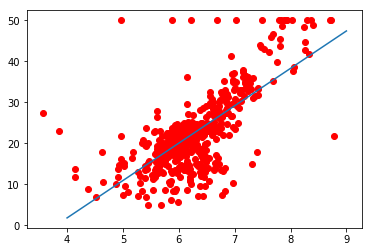

In [92]:
x1fit = np.linspace(4,9)
y1fit = modelo1.predict(x1fit[:, np.newaxis])
plt.scatter(x1,y1,color='red')
plt.plot(x1fit,y1fit)

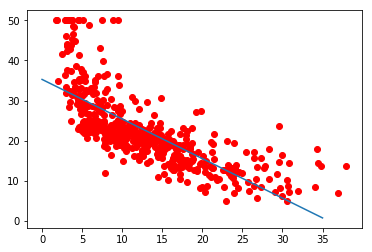

In [90]:
x2fit = np.linspace(0,35)
y2fit = modelo2.predict(x2fit[:, np.newaxis])
plt.scatter(x2,y2,color='red')
plt.plot(x2fit,y2fit)

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

In [100]:
X = boston2.drop(['MEDV'], axis=1)
y = boston2['MEDV']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.3, random_state=42)

In [102]:
modelo3 = LinearRegression()
modelo3.fit(X_train,y_train)
y_pred=modelo3.predict(X_test)
print('MSE model3:', metrics.mean_squared_error(y_test, y_pred))

MSE model3: 21.54021894393144


In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(activation='relu',hidden_layer_sizes=(20,), max_iter=200, learning_rate_init=0.001,solver='lbfgs')

mlpr

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [137]:
mlpr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [139]:
train_mse =  metrics.mean_squared_error(y_train, mlpr.predict(X_train))
test_mse =  metrics.mean_squared_error(y_test, mlpr.predict(X_test))
print("Train MSE:", train_mse)
print("Test MSE: ", test_mse)

Train MSE: 28.470373285891775
Test MSE:  26.722340974540185


In [140]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)

In [142]:
modelo4 = LinearRegression()

modelo4.fit(X_train_s,y_train)

y_pred4=modelo4.predict(X_test_s)
print('MSE model4:', metrics.mean_squared_error(y_test, y_pred))

MSE model4: 21.54021894393144


In [160]:
mlpr2l = MLPRegressor(activation='relu',hidden_layer_sizes=(128,512), max_iter=200, learning_rate_init=0.001,solver='lbfgs')
mlpr2l

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 512), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [161]:
mlpr2l.fit(X_train_s, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 512), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [163]:
train_mse_2l =  metrics.mean_squared_error(y_train, mlpr2l.predict(X_train_s))
test_mse_2l =  metrics.mean_squared_error(y_test, mlpr2l.predict(X_test_s))
print("Train MSE 2 layers:", train_mse_2l)
print("Test MSE 2 layers: ", test_mse_2l)

Train MSE 2 layers: 0.16657570426047155
Test MSE 2 layers:  12.285625515089073


El mejor modelo fue la red de dos capas con un 12.28 en MSE, el cual es casi dos veces mejor que los otros modelos, esta a diferencia de la red anterior tiene más parámetros para estimar con mayor precisión el MEDV; el modelo lineal es menos flexible que las redes neuronales, por lo cual este tiene un poder predictivo menor.

Por otro lado, dentro de los modelos lineales se pudo apreciar que el modelo con datos escalados tuvo mejor MSE que el modelo con los datos originales. Lo anterior se dio al anular las diferencias en las escalas de las variables independientes, permitiendo optimiar los resultados obtenidos.